In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv("train_modified.csv")
test = pd.read_csv("test_modified.csv")

In [270]:
y = train['Product_Supermarket_Sales']
X = train.drop(['Product_Supermarket_Sales','Product_Identifier','Supermarket_Identifier','Product_Supermarket_Identifier'],axis=1)

Xtest = test.drop(['Product_Identifier','Supermarket_Identifier','Product_Supermarket_Identifier'],axis=1)

In [274]:
Xtest.head()

,Product_Price,Product_Shelf_Visibility,Product_Weight,Product_Visibility_MeanRatio,Supermarket_Years,Product_Fat_Content_0,Product_Fat_Content_1,Product_Fat_Content_2,Supermarket_Location_Type_0,Supermarket_Location_Type_1,...,Supermarket_0,Supermarket_1,Supermarket_2,Supermarket_3,Supermarket_4,Supermarket_5,Supermarket_6,Supermarket_7,Supermarket_8,Supermarket_9
0,459.98,0.214125,8.270,1.589432,11,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,464.98,0.127821,8.270,0.948808,22,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,477.38,0.082171,7.390,1.000542,22,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,472.63,0.011791,6.115,1.473415,11,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,473.13,0.007038,6.115,0.879552,22,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=3)

y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

lw = 2
plt.figure(figsize=(12, 7))
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [62]:
#X, y = train.iloc[:,:-1],train.iloc[:,-1]

In [63]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [64]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [256]:
#features = ['Product_Visibility_MeanRatio','Product_Price','Supermarket_Years','Product_Weight','Product_Shelf_Visibility']
features = ['Supermarket_Type_3','Product_Price','Supermarket_Type_0','Product_Weight','Product_Shelf_Visibility']

col_selected = X[features]
test_col_selected = Xtest[features]

In [265]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [266]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.5, learning_rate = 0.1,
                          max_depth = 5, alpha = 5, n_estimators = 15)

In [267]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [268]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 3373.480726


In [255]:
xgpred = xg_reg.predict(Xtest)

xg_reg = pd.DataFrame({'Product_Supermarket_Identifier':test['Product_Supermarket_Identifier'],
                                  'Product_Supermarket_Sales': xgpred},
                                 columns=['Product_Supermarket_Identifier','Product_Supermarket_Sales'])

#to csv
xg_reg.to_csv('xgpred1.csv',index=False)

In [252]:
params = {"objective":"reg:linear",'colsample_bytree': 0.5,'learning_rate': 0.1,'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,num_boost_round=50,
                    early_stopping_rounds=5,metrics="rmse", as_pandas=True, seed=123)

[19:56:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[19:56:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[19:56:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[19:56:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[19:56:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[19:56:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[19:56:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:56:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[19:56:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[19:56:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[19:56:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[19:56:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[19:56:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[19:56:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:56:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[19:56:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[19:56:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[19:56:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[19:56:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[19:56:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[19:56:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

In [253]:
cv_results.head()

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
0,6945.156575,38.181217,6944.035645,15.841972
1,6394.031738,47.249800,6387.654297,19.565300
2,5917.630208,53.393584,5903.920736,31.362693
3,5500.215657,66.520346,5482.921550,35.473592
4,5143.182943,70.637211,5120.589193,40.748354


In [254]:
print((cv_results["test-rmse-mean"]).tail(1))

44    2975.320964
Name: test-rmse-mean, dtype: float64


In [72]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[19:22:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=5
[19:22:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[19:22:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[19:22:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[19:22:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[19:22:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[19:22:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

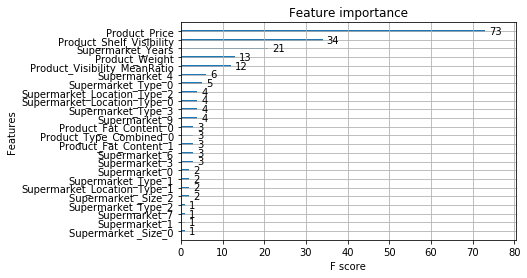

In [73]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [9, 10]
plt.show()